<a href="https://colab.research.google.com/github/Heoyuna0819/deeplearning/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


file_path = "/content/drive/MyDrive/BP_data.csv"
df = pd.read_csv(file_path)
df


,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [119]:
#결측지 확인

df.isnull().sum()



,0
Patient_Number,0
Blood_Pressure_Abnormality,0
Level_of_Hemoglobin,0
Genetic_Pedigree_Coefficient,92
Age,0
BMI,0
Sex,0
Pregnancy,1558
Smoking,0
Physical_activity,0


In [120]:
mean_value = df['Genetic_Pedigree_Coefficient'].mean()
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(mean_value)

mean_alcohol = df['alcohol_consumption_per_day'].mean()
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(mean_alcohol)

df['Pregnancy']=df['Pregnancy'].fillna(0)
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.000000,3,0,0
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.000000,2,1,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.000000,1,1,0
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.000000,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,0.0,1,26118,47568,144.000000,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,251.008532,3,1,1
1997,1998,1,16.91,0.22,18,42,0,0.0,0,14933,24753,251.008532,2,1,1
1998,1999,0,11.15,0.72,46,45,1,0.0,1,18157,15275,253.000000,3,0,1


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

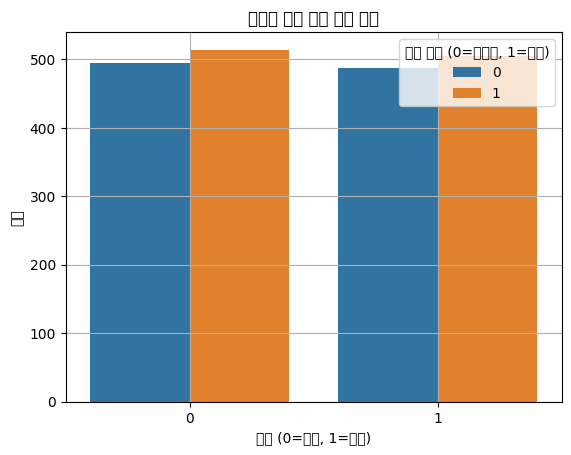

In [121]:
# 시각화: 성별에 따른 흡연 여부 분포
sns.countplot(x='Sex', hue='Smoking', data=df)

plt.title('성별에 따른 흡연 여부 분포')
plt.xlabel('성별 (0=여성, 1=남성)')
plt.ylabel('개수')
plt.legend(title='흡연 여부 (0=비흡연, 1=흡연)')
plt.grid(True)
plt.show()

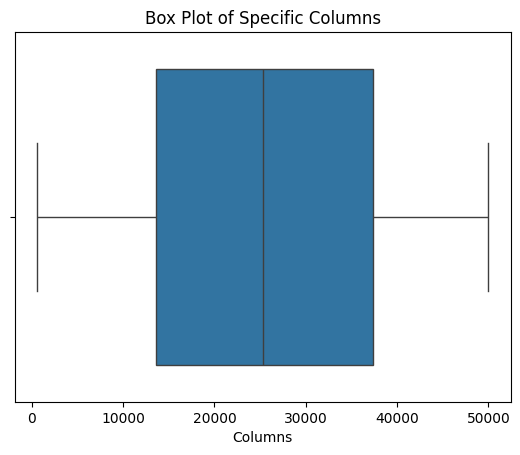

In [122]:
#boxplot
sns.boxplot(x='Physical_activity', data=df)


plt.title('Box Plot of Specific Columns')
plt.xlabel('Columns')
plt.show()

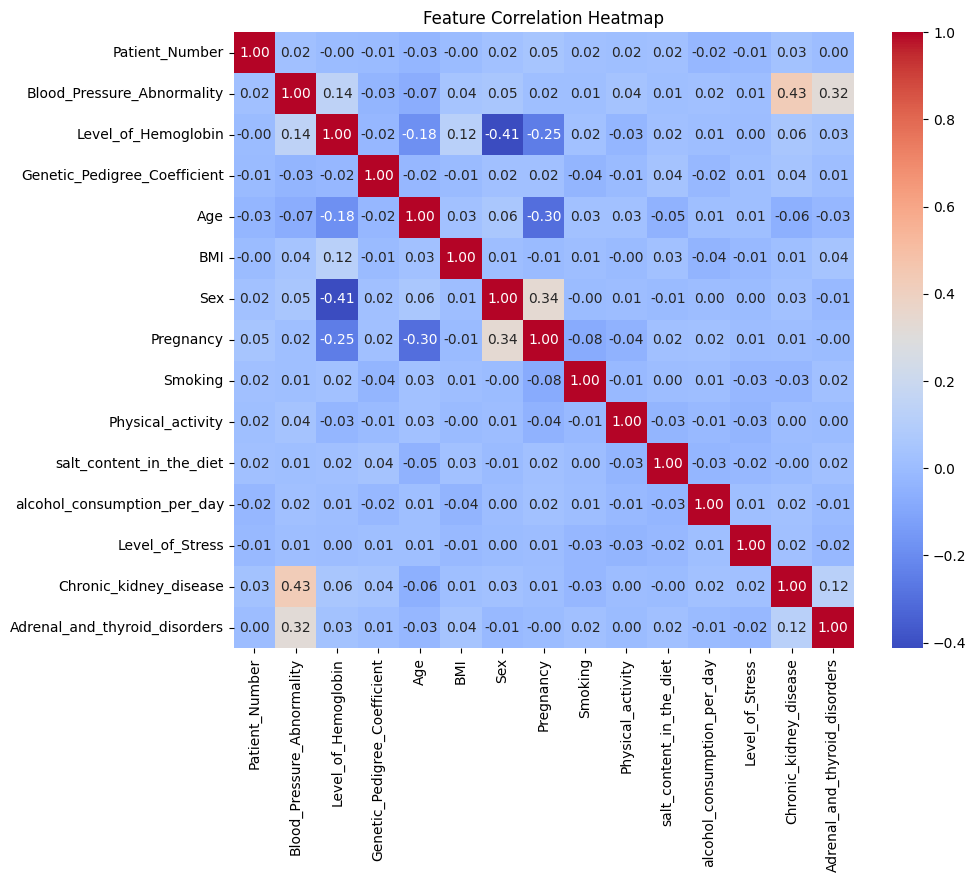

In [123]:
# 상관계수 계산
corr = df.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

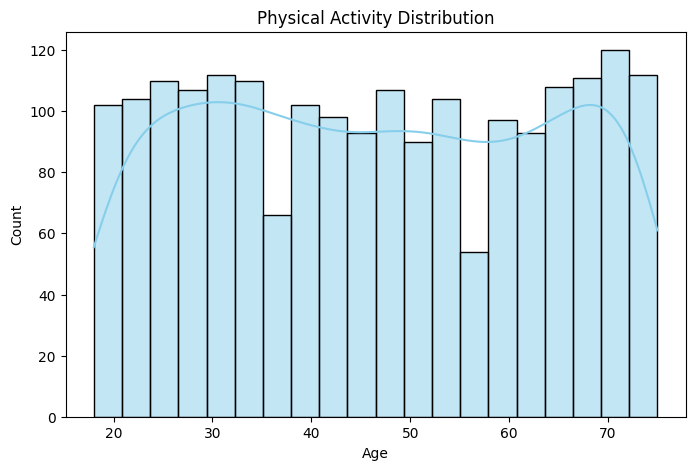

In [124]:
#histplot
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, color='skyblue', edgecolor='black',kde=True)
plt.title('Physical Activity Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

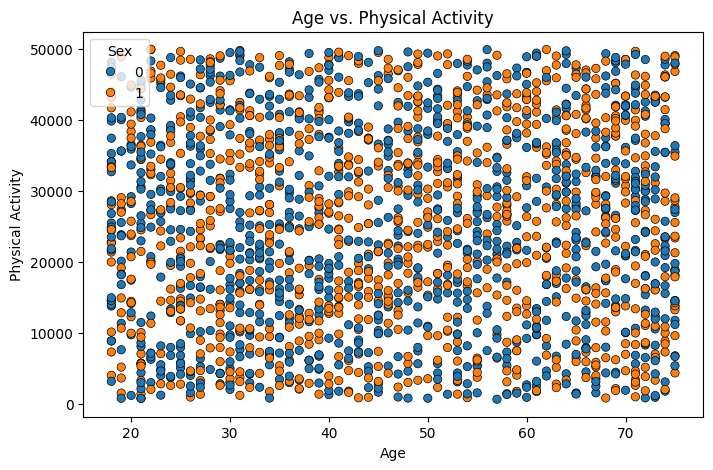

In [125]:
#sccatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Physical_activity',hue='Sex', data=df, color='skyblue', edgecolor='black')
plt.title('Age vs. Physical Activity')
plt.xlabel('Age')
plt.ylabel('Physical Activity')
plt.show()

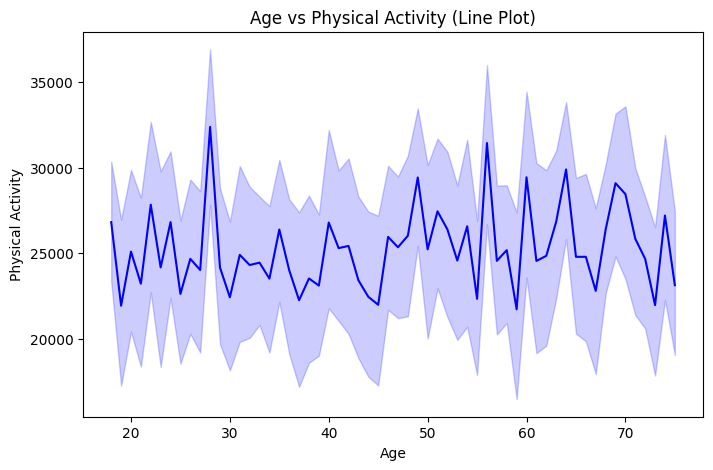

In [126]:
#line plot
plt.figure(figsize=(8, 5))
sns.lineplot(x='Age', y='Physical_activity', data=df, color='blue')
plt.title('Age vs Physical Activity (Line Plot)')
plt.xlabel('Age')
plt.ylabel('Physical Activity')
plt.show()

In [127]:
# 데이터와 타겟 분리
X = df.drop('Blood_Pressure_Abnormality', axis=1).values
y = df['Blood_Pressure_Abnormality'].values



In [ ]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape,


In [ ]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
#모델정의
class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.fc1 = nn.Linear(14, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))

        return x


model = DiabetesModel()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
train_losses = []
test_accuracies = []

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        labels = labels.float().unsqueeze(1)  # labels 차원 맞추기 (배치 크기, 1)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)  # 모델의 출력 (로짓 값)
        loss = criterion(outputs, labels)  # 로짓과 레이블의 크기 맞추기

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            labels = labels.float().unsqueeze(1)  # labels 차원 맞추기 (배치 크기, 1)
            outputs = model(inputs)  # 모델의 출력 (로짓 값)
            predicted = torch.sigmoid(outputs) >= 0.5  # sigmoid로 확률 변환 후 0.5 기준으로 예측
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

In [ ]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')